In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [2]:
with gzip.open("hists_quantile_qcd.pkl.gz") as fin:
    hists = pickle.load(fin)

In [3]:
with gzip.open("hists_quantile_hbb.pkl.gz") as fin2:
    hists2 = pickle.load(fin2)

In [4]:
print(hists)
print(hists2)

{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd640287278>}
{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd640287240>}


In [5]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    hists2[key] = hists2[key].group(process, process_cats, process_map)

/uscms/home/separk/nobackup/coffea/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [6]:
x = hists['hjetpt']
x2 = hists2['hjetpt']

In [7]:
print(x)
print(x2)

<Hist (process,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd61651c400>
<Hist (process,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd640287278>


In [8]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='allnan')
y2 = x2.project("AK8Puppijet0_pt", slice(450,None), overflow='allnan')

In [9]:
print(y)
print(y2)

<Hist (process,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd6168800b8>
<Hist (process,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd616880160>


In [10]:
z = y.sum("jetrho")
z2 = y2.sum("jetrho")

In [11]:
print(z)
print(z2)

<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd616510eb8>
<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fd616510f28>


In [12]:
print(z2.values())

{('Hbb',): array([[0.01836856, 0.02904796, 0.02920816, 0.02787323, 0.02699218,
        0.02568395, 0.02683199, 0.02565725, 0.02525677, 0.02539027,
        0.02472281, 0.02531018, 0.02541697, 0.02720577, 0.02934165,
        0.03089017, 0.02968873, 0.03174452, 0.03460126, 0.035509  ,
        0.03713761, 0.04050162, 0.0461083 , 0.04661558, 0.05080723,
        0.05758866, 0.06506424, 0.07312718, 0.08260513, 0.09979898,
        0.1242281 , 0.1559993 , 0.21518986, 0.33714864, 0.65117633,
        1.2616909 , 1.7746224 , 1.5803642 , 0.97014326, 0.23192984],
       [0.02509658, 0.04194333, 0.0408487 , 0.0373245 , 0.03705752,
        0.03692403, 0.03339982, 0.03489494, 0.03388039, 0.03321294,
        0.03492163, 0.03582938, 0.03793857, 0.03721771, 0.03972736,
        0.04351855, 0.04325157, 0.0478704 , 0.04944562, 0.05427803,
        0.05596004, 0.06121965, 0.06618558, 0.07440871, 0.07913435,
        0.0887191 , 0.10001256, 0.11357541, 0.13031535, 0.15581241,
        0.18251088, 0.23299775, 0.31

In [ ]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [13]:
t = z.project("process").values(overflow='allnan')
t2 = z2.project("process").values(overflow='allnan')

In [ ]:
background = multidim_cumsum(t[()])
signal = multidim_cumsum(t2[()])

In [ ]:
sqrtbkg = np.sqrt(background)

In [ ]:
print(sqrtbkg)

In [ ]:
soverb = signal/(sqrtbkg+1)
print(soverb)
norm_soverb = soverb/np.amax(soverb)
print(norm_soverb)

<IPython.core.display.Javascript object>


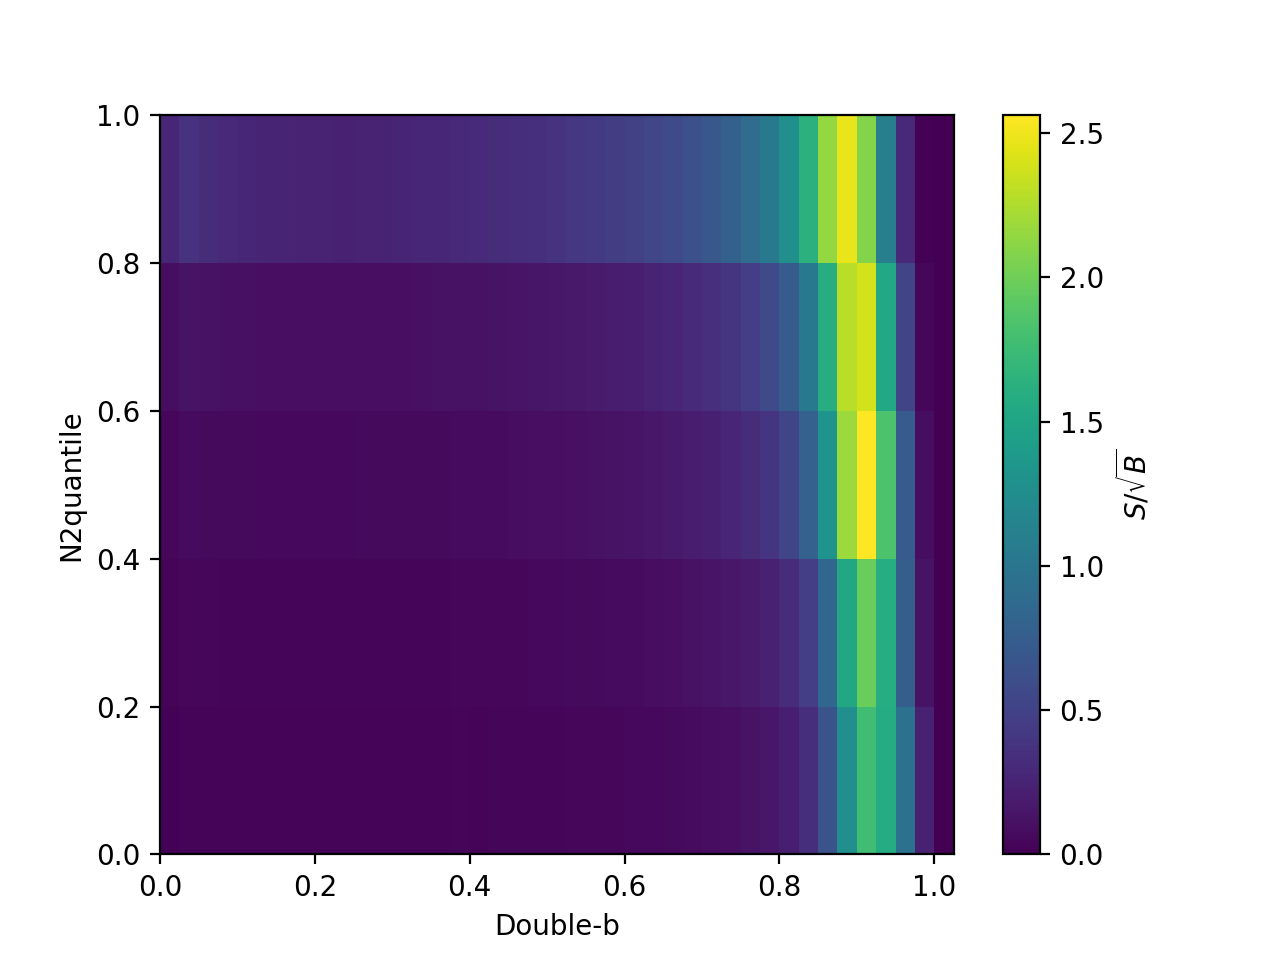

In [14]:
htemp = z2.project("process")
htemp.clear()
htemp.label = '$S/\sqrt{B}$'
htemp._sumw = {():t2[()]}
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [15]:
fig.savefig("plots/HBB_quantile_doubleb_5bins.pdf")


In [ ]:
tuples = (1,2,3)

In [ ]:
print(tuples)

In [ ]:
tuples = tuples[::-1]

In [ ]:
print(tuples)

In [ ]:
htemp2 = z.project("process")
fig2, ax2, _ = plot.plot2d(htemp2, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='allnan', patch_opts={})

In [ ]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [ ]:
print(a)

In [ ]:
b = multidim_cumsum(a)

In [ ]:
print(b)

In [ ]:
tt = z.project("process").values(overflow='allnan')


In [ ]:
print(tt)

In [ ]:
print(hists)

In [ ]:
print(y)

In [ ]:
fig2, ax, _ = plot.plot2d(y2.sum("jetrho").sum("process"), xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [ ]:
fig2.savefig("plots/HBB_quantiledoubleb.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig3, ax, _ = plot.plot1d(y2.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig3.savefig("plots/QCD_quantile.pdf")


In [ ]:
fig4, ax, _ = plot.plot2d(y.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig4.savefig("plots/QCD_N2_jetrho.pdf")


In [ ]:
fig5, ax, _ = plot.plot2d(x.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
fig5.savefig("plots/QCD_N2_jetpt.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig6, ax, _ = plot.plot1d(y.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig7, ax, _ = plot.plot2d(y2.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig5, ax, _ = plot.plot2d(x2.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [ ]:
print(a)

In [ ]:
multidim_cumsum(a)